# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [55]:
# Libraries
import numpy as np
import pylab as plt
import seaborn as sns
from pandas.plotting import andrews_curves
#import lux
import pandas as pd
import qgrid
from itables import init_notebook_mode
from itables import show

plt.rcParams['figure.figsize']=(12, 4)  # tamaño por defecto para los plots


# Your Code Here

In [ ]:
!pip install itables


In [ ]:
!pip install qgrid


## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [24]:
fitbit = pd.read_csv('/Users/jeffworker/Documents/GitHub/Bootcamp/Laboratorios/5.2-lab-matplotlib-seaborn/data/Fitbit2.csv')





#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [44]:
fitbit.head()


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [28]:
# AVERAGE STEPS BY MONTH_ENCODED

avg_month = fitbit.Months_encoded.mean()

avg_month

6.501362397820164

<AxesSubplot:xlabel='Months_encoded'>

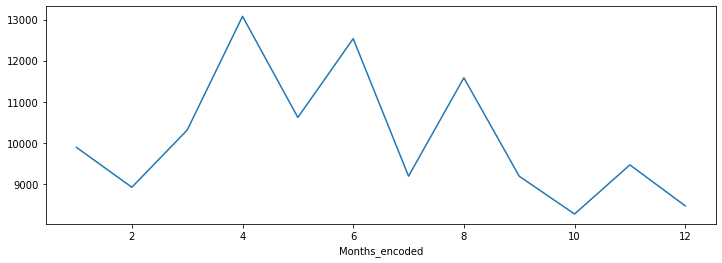

In [42]:
fitbit.groupby('Months_encoded').mean().Steps.plot(
    figsize=(12, 4))

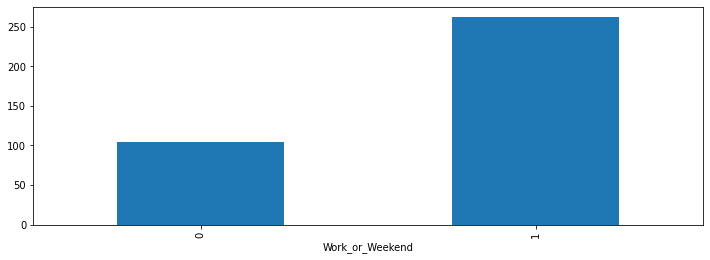

In [40]:
# AVERAGE STEPS BY WORK_OR_WEEKEND

ww = fitbit.groupby('Work_or_Weekend').count().Steps.plot(
    kind="bar",
    figsize=(12,4))


# Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

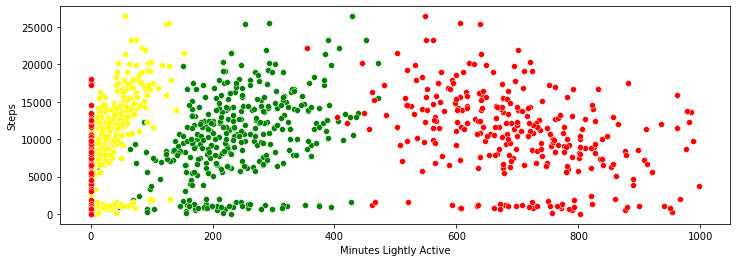

In [56]:
scatter_plots=['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']

for i in range(len(scatter_plots)):
    palette=['green', 'yellow', 'red']
    sns.scatterplot(data=fitbit, x=scatter_plots[i], y='Steps', color=palette[i]);

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [57]:
titanic = pd.read_csv('/Users/jeffworker/Documents/GitHub/Bootcamp/Laboratorios/5.2-lab-matplotlib-seaborn/data/titanic.csv')


#### Explore the titanic dataset using Pandas dtypes.

In [59]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [62]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include='int64').columns

Index(['PassengerId', 'Pclass', 'SibSp', 'Parch'], dtype='object')

In [63]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include='object').columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [82]:
plt.rcParams['figure.figsize']=(12, 6)
pd.set_option('display.max_columns',None)
plt.style.use('classic')
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

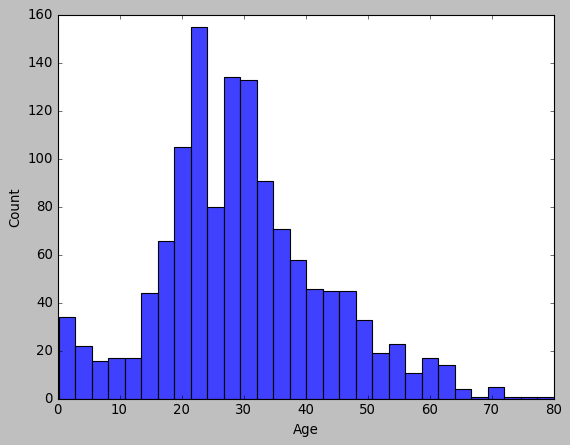

In [67]:
sns.histplot(x=titanic.Age)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

In [68]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


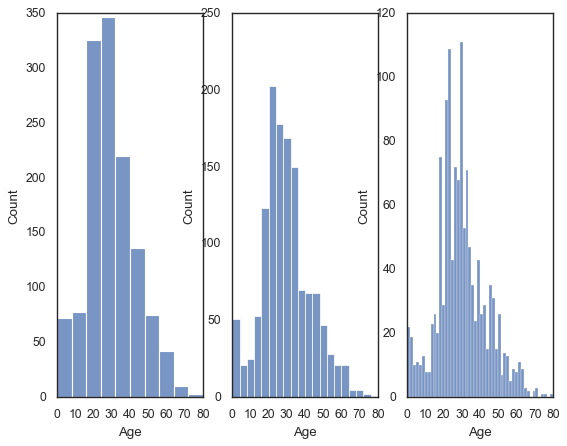

In [179]:
fig, ax = plt.subplots(1, 3)
bins=[10,20,50]

for i, e in enumerate(bins):
    sns.histplot(x=titanic.Age, bins=e, ax= ax[i], palette ='deep')
    
    
    

#### How does the bin size affect your plot?

In [ ]:
"""
Se ve mucho mas claro cada dato en el 1º, pero la distribucion es mejor en el 3º grafico.
"""

#### Use seaborn to show the distribution of column `Age`.

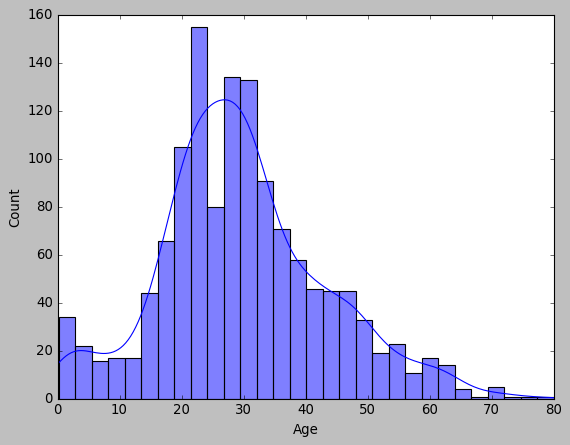

In [79]:
# your code here


sns.histplot(x=titanic.Age, 
             bins=30,
             kde=True  # kernel density estimation
            );

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:xlabel='Gender', ylabel='Count'>

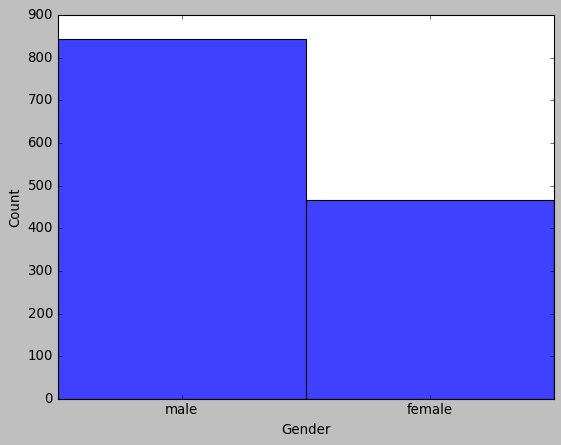

In [80]:
# Method 1 - seaborn

sns.histplot(x=titanic.Gender)


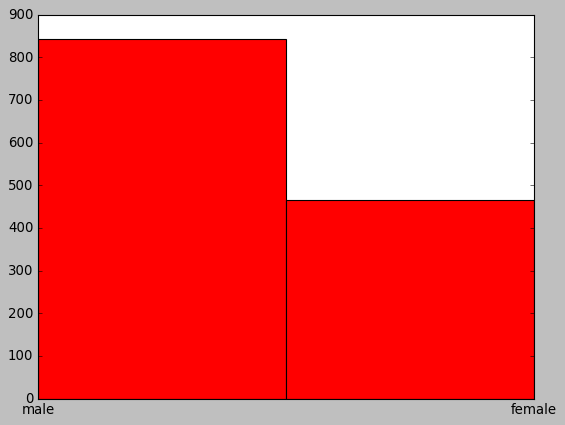

In [115]:
# Method 2 - matplotlib


plt.hist(x=titanic.Gender, bins=2, color='r');
# your code here

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

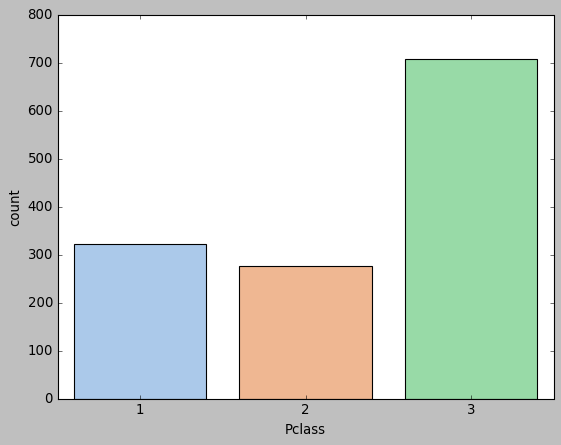

In [110]:
# your code here

sns.countplot(x=titanic.Pclass, palette='pastel')


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

/Users/jeffworker/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


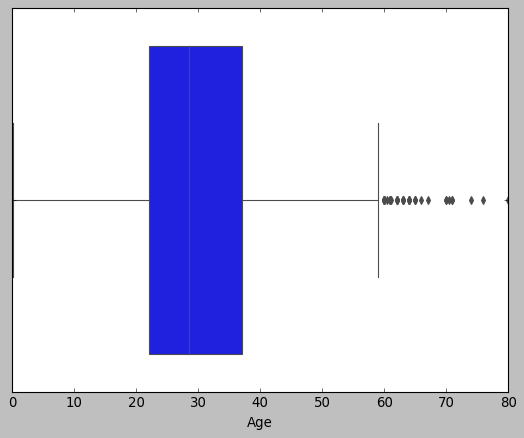

In [117]:
# your code here

sns.boxplot(titanic.Age); 


In [ ]:
"""
Box plot to know mean and outliers over 60years"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
Box plot to know mean and outliers over 60years 

"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

/Users/jeffworker/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

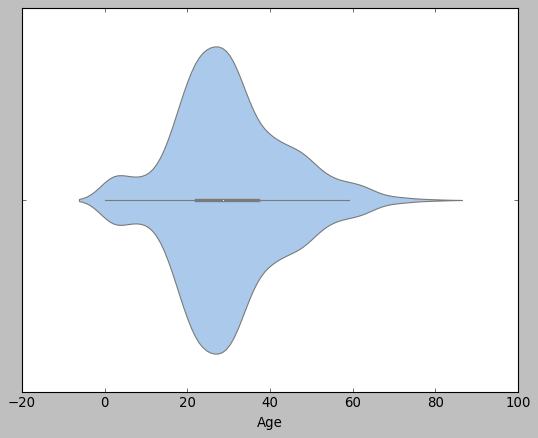

In [129]:
# your code here


sns.violinplot(titanic.Age, palette="pastel")

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""when you want to observe the distribution of numeric data, and are especially useful 
when you want to make a comparison of distributions between multiple groups.
 """

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

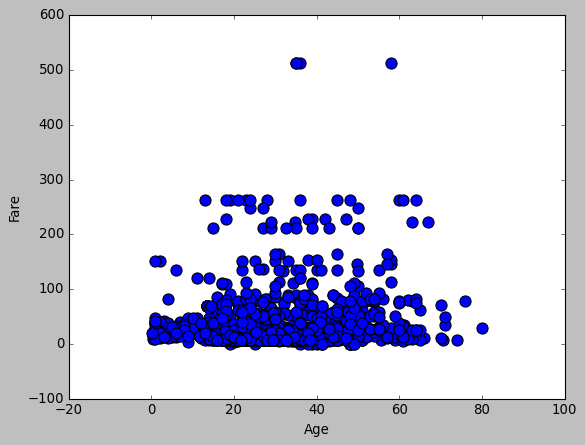

In [141]:
# Method 1 - matplotlib

titanic.plot.scatter(x='Age', y='Fare',s=100)


# your code here

<AxesSubplot:xlabel='Age', ylabel='Fare'>

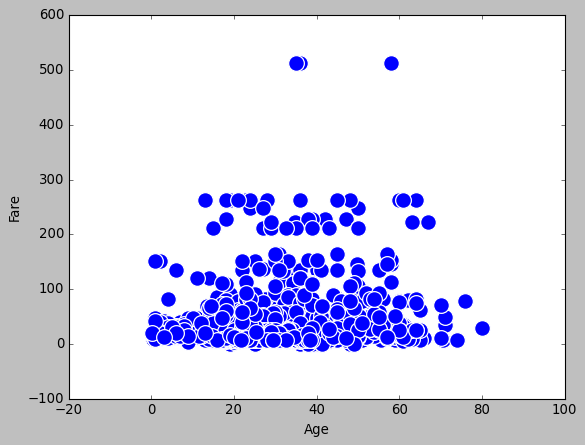

In [152]:
# Method 2 - seaborn


sns.scatterplot(data= titanic, x='Age', y='Fare', palette='pastel',s=200 )

#### Plot the correlation matrix using seaborn.

In [154]:
# your code here


corr=titanic.corr(method='pearson')


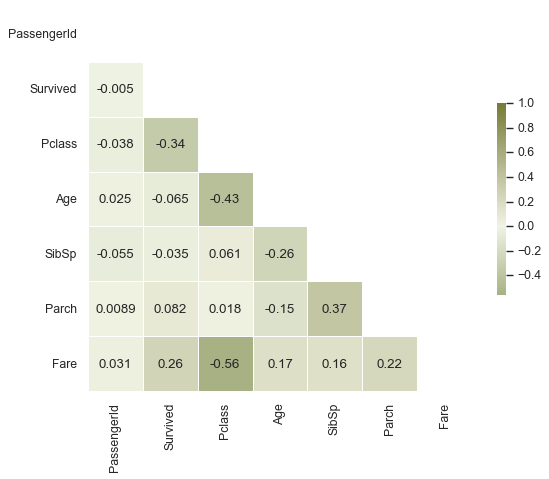

In [170]:
sns.set(style='white')     # estilo blanco


mascara=np.triu(np.ones_like(corr, dtype=bool))   # genera una mascara para tapar valores


cmap=sns.diverging_palette(98, 90, as_cmap=True)   # paleta de colores


sns.heatmap(corr,
            mask=mascara,
            cmap=cmap,
            vmax=1,
            center=0,
            square=True,
            linewidth=0.5,
            cbar_kws={'shrink': 0.5},
            annot=True
           );

#### What are the most correlated features?

In [ ]:
"""
pclass & Fare"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

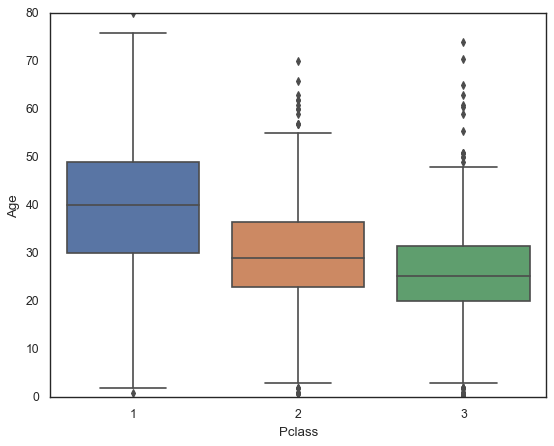

In [174]:

sns.boxplot(data=titanic, x='Pclass', y='Age');
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

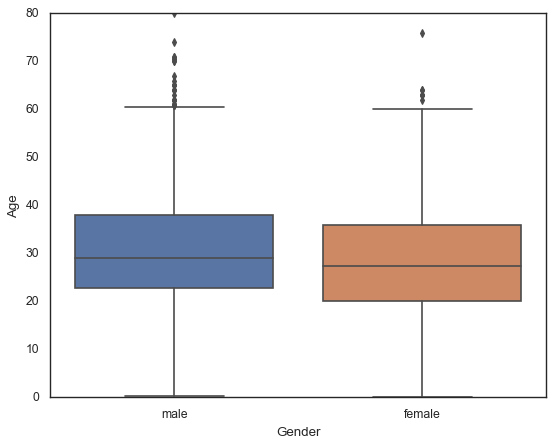

In [175]:
sns.boxplot(data=titanic, x='Gender', y='Age');
